## Spatially Autocorrelated Events

Examining spatial processes that may involve dependencies among the analysis areas. Such dependencies are often termed spatial autocorrelation. Tests for local autocorrelation typically involve evaluating whether or not a process is random for individual geographic features (given their neighboring features). That is, the output of the test is a measure of spatial autocorrelation for many features within a region. As there are many individual tests being conducted, things become a bit more complicated given that many hypotheses are also under consideration

In [1]:
# Load relevant R packages
inLibraries = list('repr','rgdal','spdep','classInt')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))      
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

Warning message:
"package 'rgdal' was built under R version 3.4.2"Warning message:
"package 'sp' was built under R version 3.4.2"Warning message:
"package 'spdep' was built under R version 3.4.2"Warning message:
"package 'classInt' was built under R version 3.4.2"

In [2]:
#Read in the featureclass
inFeatures <- readOGR("datasets/washington","WAfn")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/washington", layer: "WAfn"
with 900 features
It has 6 fields


In [3]:
peek <- head(inFeatures@data)
peek

,Id,ConfigA,ConfigB,ConfigC,ConfigD,ConfigE
0,0,75,70,28,43,92
1,0,54,59,26,40,21
2,0,85,17,99,66,24
3,0,76,70,94,96,37
4,0,32,99,93,38,97
5,0,96,8,2,93,27


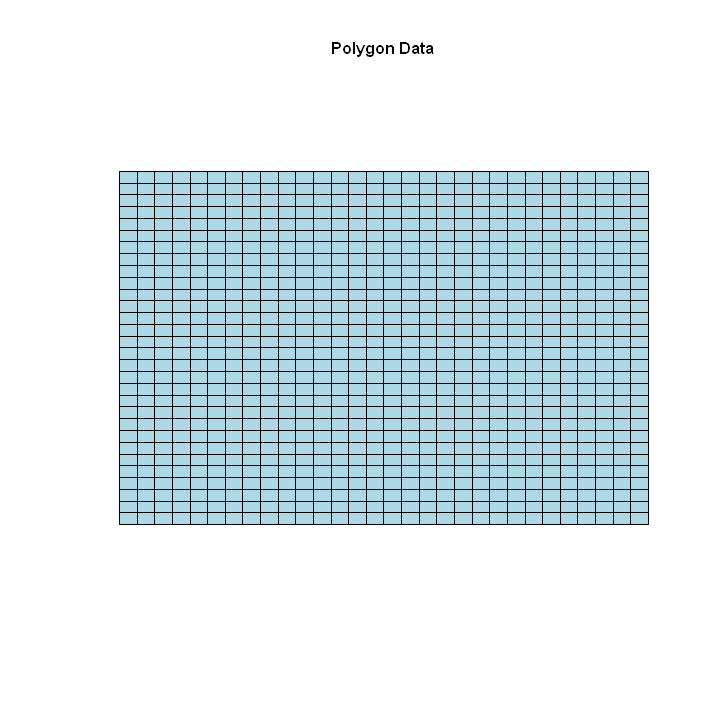

In [4]:
#plot the polygon data
plot(inFeatures, col = 'lightblue', 
         lwd = 0.2, main = "Polygon Data", cex.main = 0.8)

## Feature Attribute to Analyze

In most assessments of spatial autocorrelation, some attribute of each feature is compared relative to that of it's neighbors. Therefore, let's select an attribute to analyze.

In [5]:
#retrieve variables
inVa <- inFeatures$ConfigA
inVb <- inFeatures$ConfigB
inVc <- inFeatures$ConfigC
inVd <- inFeatures$ConfigD
inVe <- inFeatures$ConfigE

In [6]:
head(inVa)

[1] 75 54 85 76 32 96

In [7]:
head(inVb)

[1] 70 59 17 70 99  8

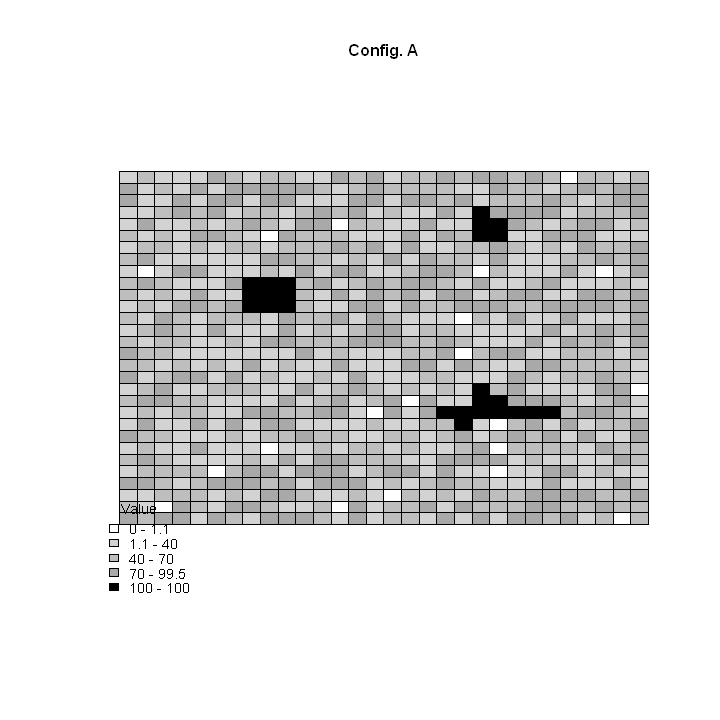

In [8]:
#classify variable
numcat <- 5

z <- classIntervals(inVa, n = numcat, style = "fixed", fixedBreaks = c(0,1.1,40,70,99.5,100))
pal <- c("white","lightgray","gray","darkgray","black")
cols <- findColours(z, pal)

#plot variable
plot(inFeatures,col=cols, lwd=.2,main="Config. A",cex.main=.8)
brks <- round(z$brks,3)
leg.text <- paste(brks[-numcat], brks[-1], sep=" - ")
legend("bottomleft",fill=attr(cols,"palette"),legend=leg.text,bty="n",title="Value",cex=.7)

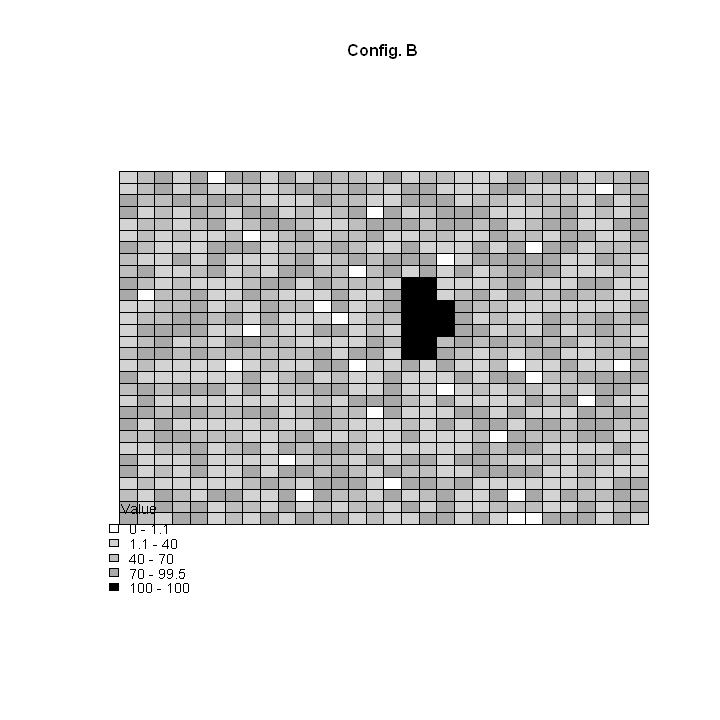

In [9]:
#classify variable
numcat <- 5

z <- classIntervals(inVb,n=numcat, style="fixed",fixedBreaks=c(0,1.1,40,70,99.5,100))
pal <- c("white","lightgray","gray","darkgray","black")
cols <- findColours(z, pal)

#plot variable    
plot(inFeatures,col=cols, lwd=.2,main="Config. B",cex.main=.8)
brks <- round(z$brks,3)
leg.text <- paste(brks[-numcat], brks[-1], sep=" - ")
legend("bottomleft",fill=attr(cols,"palette"),legend=leg.text,bty="n",title="Value",cex=.7)

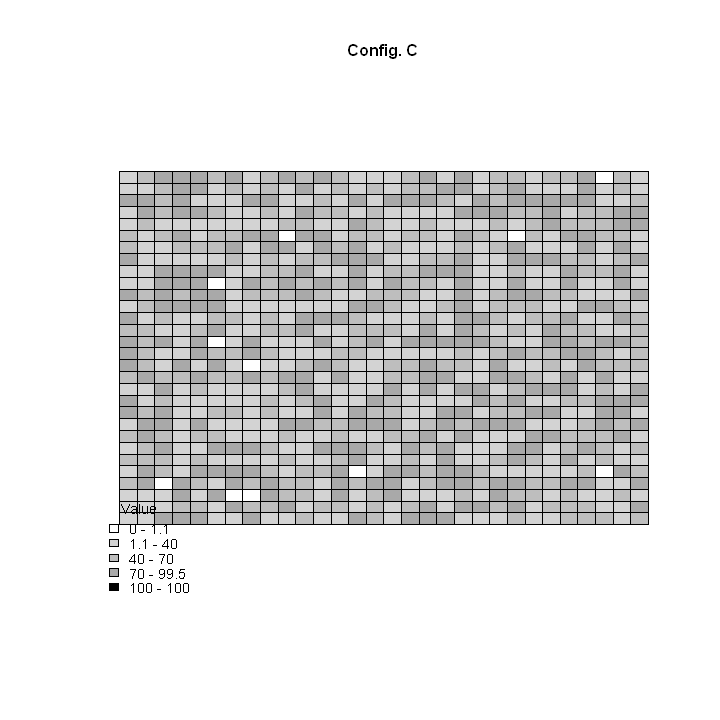

In [10]:
#classify variable
numcat <- 5

z <- classIntervals(inVc,n=numcat, style="fixed",fixedBreaks=c(0,1.1,40,70,99.5,100))
pal <- c("white","lightgray","gray","darkgray","black")
cols <- findColours(z, pal)

#plot variable
plot(inFeatures,col=cols, lwd=.2,main="Config. C",cex.main=.8)
brks <- round(z$brks,3)
leg.text <- paste(brks[-numcat], brks[-1], sep=" - ")
legend("bottomleft",fill=attr(cols,"palette"),legend=leg.text,bty="n",title="Value",cex=.7)

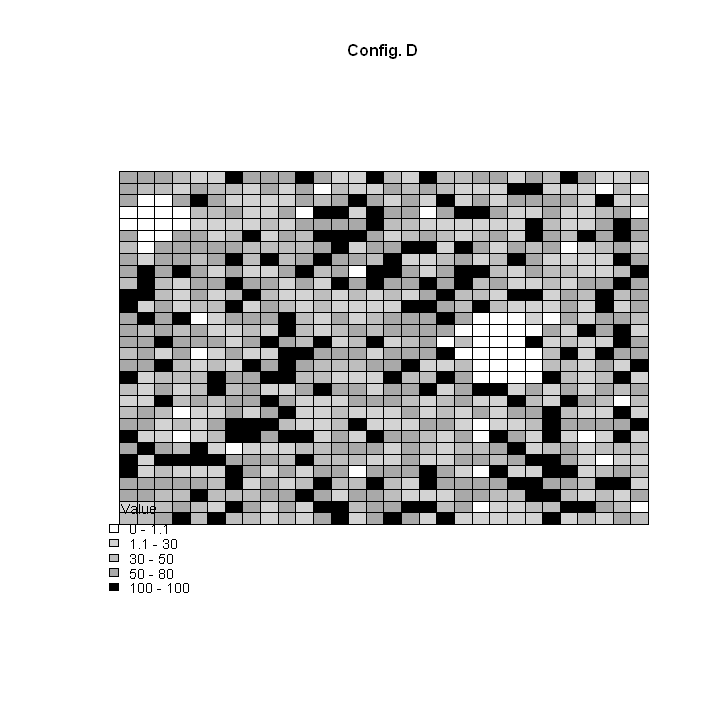

In [11]:
#classify variable
numcat <- 5

z <- classIntervals(inVd,n=numcat, style="fixed",fixedBreaks=c(0,1.1,30,50,80,100))
pal <- c("white","lightgray","gray","darkgray","black")
cols <- findColours(z, pal)

#plot variable
plot(inFeatures,col=cols, lwd=.2,main="Config. D",cex.main=.8)
brks <- round(z$brks,3)
leg.text <- paste(brks[-numcat], brks[-1], sep=" - ")
legend("bottomleft",fill=attr(cols,"palette"),legend=leg.text,bty="n",title="Value",cex=.7)

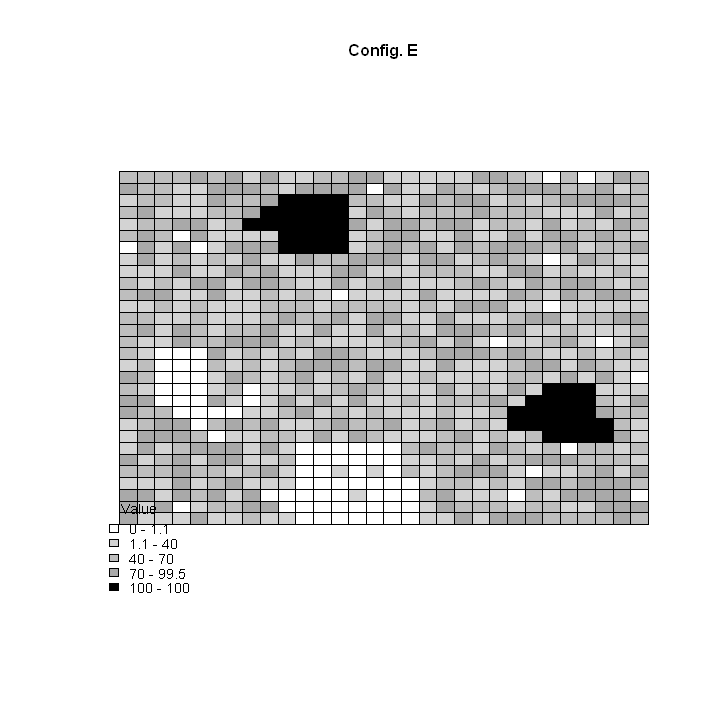

In [12]:
#classify variable
numcat <- 5

z <- classIntervals(inVe,n=numcat, style="fixed",fixedBreaks=c(0,1.1,40,70,99.5,100))
pal <- c("white","lightgray","gray","darkgray","black")
cols <- findColours(z, pal)

#plot variable
plot(inFeatures,col=cols, lwd=.2,main="Config. E",cex.main=.8)
brks <- round(z$brks,3)
leg.text <- paste(brks[-numcat], brks[-1], sep=" - ")
legend("bottomleft",fill=attr(cols,"palette"),legend=leg.text,bty="n",title="Value",cex=.7)

## Test for Local Spatial Autocorrelation

While some of the configurations outlined above do contain some clear instances of spatial autocorrelation given how the data values were classified, others are less clear. To test whether or not the distribution of values in this region are significantly different from what would be observed if they were randomly distributed, a global test for autocorrelation can be applied. In other words, given the relationships among all features in the region, a single summary metric can be produced to test the null hypothesis that the variable of interest is randomly distributed among the set of features being analyzed. 

### Local Moran's I

It is also possible to compute the Moran statistic for each feature vs for the entire set of features as a whole. This type of computation is called a local spatial statistic. Just as with the global Moran's I, the null hypothesis is that the variable is distributed randomly among the features in the region. In this example, the localmoran() function (spdep library) can be used to compute the local Moran statistic. The localmoran() function requires the analysis variable, a .listw list of spatial neighbors and the form of the hypothesis to be tested. 


### Defining Neighborhoods

Just as with the global Moran statistic, the first step is to define neighborhoods for each feature (square areas in this case). In this case, let's consider the Queens's criterion for adjacency.

In [13]:
#Identify the neighbors of each feature
inFeatures.nb <- poly2nb(inFeatures,queen=TRUE)

In [14]:
inFeatures.nb

Neighbour list object:
Number of regions: 900 
Number of nonzero links: 6844 
Percentage nonzero weights: 0.8449383 
Average number of links: 7.604444 

### Generate Neighborhood Lists

Transform the neighborhood objects into lists.

In [15]:
#Retrieve neighborhood list
inFeatures.listb <- nb2listw(inFeatures.nb,style="B")
inFeatures.listw <- nb2listw(inFeatures.nb,style="W")

In [16]:
names(inFeatures.listb)

[1] "style"      "neighbours" "weights"

In [17]:
names(inFeatures.listb)

[1] "style"      "neighbours" "weights"

In [18]:
head(inFeatures.listb$neighbours)

[[1]]
[1]  2 31 32

[[2]]
[1]  1  3 31 32 33

[[3]]
[1]  2  4 32 33 34

[[4]]
[1]  3  5 33 34 35

[[5]]
[1]  4  6 34 35 36

[[6]]
[1]  5  7 35 36 37

## Moran Test - Configuration A

In config. A, several artificial clusters were clearly present.

In [19]:
#Compute local Moran
featA.MIi <- localmoran(inVa, inFeatures.listw, alternative = "two.sided")

In [20]:
head(featA.MIi)

,Ii,E.Ii,Var.Ii,Z.Ii,Pr(z != 0)
0,-0.31292527,-0.001112347,0.3322948,-0.54091915,0.5885633
1,-0.01992528,-0.001112347,0.1989322,-0.04217974,0.9663554
2,-0.24297624,-0.001112347,0.1989322,-0.54227362,0.5876300
3,-0.09249805,-0.001112347,0.1989322,-0.20489234,0.8376562
4,-0.21375916,-0.001112347,0.1989322,-0.47676714,0.6335279
5,-0.56975805,-0.001112347,0.1989322,-1.27493840,0.2023310


### Access the Output from Local Moran Test

The test also reports some other important info: a) the actual I statistic values for each feature, b) the z-scores, and the c) p-values. Below, let's print a list of these outputs of the local Moran test. Then, let's access and store the I values, z-scores, and p-values for later use.

In [23]:
#look at the fields of the result object to find the index of 
# the desired attributes

colnames(featA.MIi)

[1] "Ii"         "E.Ii"       "Var.Ii"     "Z.Ii"       "Pr(z != 0)"

In [24]:
#retrieve the Moran I value, the z-score and the p-value
AiMIi <- featA.MIi[,1]
AzMIi <- featA.MIi[,4]
AprMIi <- featA.MIi[,5]

In [25]:
AiMIi[1:5] # Moran I value

0           1           2           3           4 
-0.31292527 -0.01992528 -0.24297624 -0.09249805 -0.21375916

In [26]:
AzMIi[1:5] # Z score

0           1           2           3           4 
-0.54091915 -0.04217974 -0.54227362 -0.20489234 -0.47676714

In [27]:
AprMIi[1:5] # p value

0         1         2         3         4 
0.5885633 0.9663554 0.5876300 0.8376562 0.6335279

## Mapping the Test Statistic

The test statistic values for any of the attributes returned can be easily mapped for visualization. 

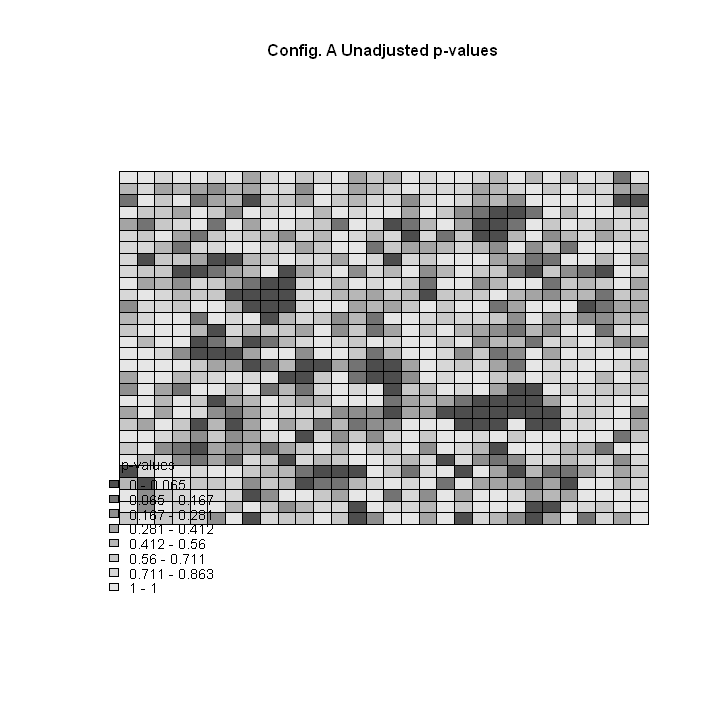

In [28]:
#classify significance values
numcat <- 8
AzM.MIi <- classIntervals(AprMIi,n=numcat, style="kmeans") # aprMIi = p values

#plot classified z-scores
pal <- gray.colors(numcat)
cols <- findColours(AzM.MIi, pal)

plot(inFeatures, col = cols, lwd = 0.2,
     main = "Config. A Unadjusted p-values", cex.main = 0.8)

brks <- round(AzM.MIi$brks, 3)

leg <- paste(brks[-numcat], brks[-1], sep=" - ")

legend("bottomleft", fill = pal, legend = leg, 
       bty = "n", title = "p-values", cex = 0.7)

### Finding the z-scores Significant at a Particular Confidence Level

While simply mapping the significance associated with each features hypothesis test is done above, it is not really that informative unless that significance is compared relative to some confidence level and unless information is provided on the nature of spatial autocorrelation (i.e. positive or negative. So, let's find a classification of the data that conveys that information in a much more appropriate manner.  The z-scores and p-values provided with the test statistic are unadjusted, meaning they are simply based on the assumption of normality and testing of a single hypothesis.

First, let's find which z-scores are significant at the .90 confidence level. This is done below and the z-score associated with the 0.90 confidence level is 1.64485. Thus, we can now map all of the areas that have a negative z-score less than 1.64485 (areas exhibiting positive spatial autocorrelation) and areas with a positive z-score greater than 1.6485 (areas exhibiting negative spatial autocorrelation).

In [29]:
#pick a confidence level
pr <- 0.90

#convert confidence levels to significance probs.
inpr <- 1-((1-pr)/2)

In [30]:
inpr

[1] 0.95

In [31]:
#compute normal error for z-score
errorZ <- qnorm(inpr, lower.tail = TRUE)

errorZ

[1] 1.644854

In [32]:
zNormal <- 0 + errorZ 

zNormal

[1] 1.644854

In [33]:
#for each confidence level, print the confidence level and corresponding z-value
paste(pr, zNormal, sep = "   ")

[1] "0.9   1.64485362695147"

### Mapping Significant z-scores

Next, the classIntervals() function (classInt library) can be used to classify the z-scores into classes below and above the significant z-scores. Well, looks like the three clusters in config. A have been detected...as well as a number of other areas of signficant autocorrelation.

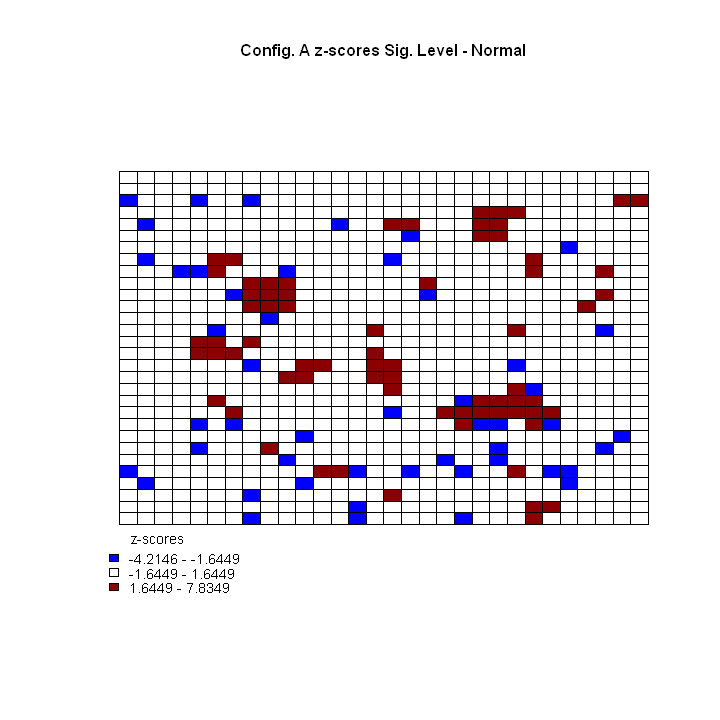

In [35]:
#determine number of class breaks and classify normal z-score significance
ncz1 <- 3 + length(pr) - 1
ncz2 <- 3 + length(pr)
AzM.MIi <- classIntervals(AzMIi,n = ncz1, style = "fixed",
                          fixedBreaks = c(min(AzMIi), -zNormal, 
                                        zNormal, max(AzMIi)))

#plot classified z-scores
pal1 <- c("blue","white","red4")

cols.AMIi <- findColours(AzM.MIi, pal1)

plot(inFeatures, col = cols.AMIi, lwd = 0.2, 
             main = "Config. A z-scores Sig. Level - Normal",
             cex.main = 0.8)

brks <- round(AzM.MIi$brks, ncz2)

leg <- paste(brks[-ncz2], brks[-1], sep=" - ")

legend("bottomleft", fill = pal1, legend = leg, 
       bty = "n", title = "z-scores", cex = 0.7)

In [36]:
names(AzM.MIi)

[1] "var"  "brks"

In [37]:
AzM.MIi$var[1:10]

0           1           2           3           4           5 
-0.54091915 -0.04217974 -0.54227362 -0.20489234 -0.47676714 -1.27493840 
          6           7           8           9 
-0.07138280 -1.98616471  0.30295467  0.54989806

In [38]:
AzM.MIi$brks[1:10]

[1] -4.214576 -1.644854  1.644854  7.834898        NA        NA        NA
 [8]        NA        NA        NA

## Moran Test - Configuration B

In config. B, one artificial cluster was clearly present. Let's see what is uncovered by the local Moran Test.


In [39]:
#Compute local Moran
featB.MIi <- localmoran(inVb, inFeatures.listw, alternative="two.sided")

head(featB.MIi)

,Ii,E.Ii,Var.Ii,Z.Ii,Pr(z != 0)
0,0.1997545,-0.001112347,0.3323354,0.3484336,0.7275146
1,0.1048060,-0.001112347,0.1989565,0.2374610,0.8122992
2,-0.4443857,-0.001112347,0.1989565,-0.9937854,0.3203274
3,0.5342474,-0.001112347,0.1989565,1.2002361,0.2300476
4,0.2008744,-0.001112347,0.1989565,0.4528391,0.6506646
5,-0.5483256,-0.001112347,0.1989565,-1.2268108,0.2198937


In [40]:
#retrieve the z-score 
BzMIi <- featB.MIi[,4]

BzMIi[1:5]

0          1          2          3          4 
 0.3484336  0.2374610 -0.9937854  1.2002361  0.4528391

### Map the Moran z-scores for Config. B

The autocorrelation tests for config. B seem to have uncovered the single cluster at the .90 confidence level. Also, not the numerous significant pockets of clustering of low values.


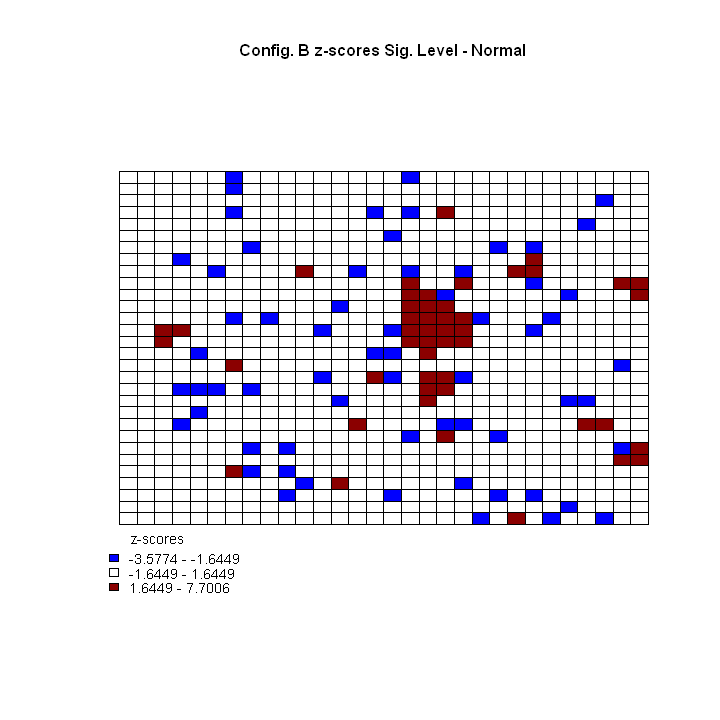

In [41]:
#determine number of class breaks and classify normal z-score significance
ncz1 <- 3 + length(pr) - 1

ncz2 <- 3 + length(pr)

BzM.MIi <- classIntervals(BzMIi,n = ncz1, style = "fixed", 
                          fixedBreaks = c(min(BzMIi), -zNormal, zNormal, max(BzMIi)))

#plot classified z-scores
pal1 <- c("blue", "white", "red4")

cols.BMIi <- findColours(BzM.MIi, pal1)

plot(inFeatures, col = cols.BMIi, lwd = 0.2,
     main = "Config. B z-scores Sig. Level - Normal", cex.main = 0.8)

brks <- round(BzM.MIi$brks, ncz2)

leg <- paste(brks[-ncz2], brks[-1], sep=" - ")

legend("bottomleft", fill = pal1, legend = leg, 
       bty = "n", title = "z-scores", cex = 0.7)

## Moran Test - Configuration C

In config. C, all areas were assigned a random value. Let's see what is uncovered by the local Moran Test.

In [42]:
#Compute local Moran
featC.MIi <- localmoran(inVc, inFeatures.listw,alternative="two.sided")

#retrieve the Moran I z-score
CzMIi <- featC.MIi[,4]

### Map the Moran z-scores for Config. C

The autocorrelation tests for config. C seem to have uncovered many distributed pockets of spatial autocorrelation but, most of the area seem rather devoid of significant autocorrelation.

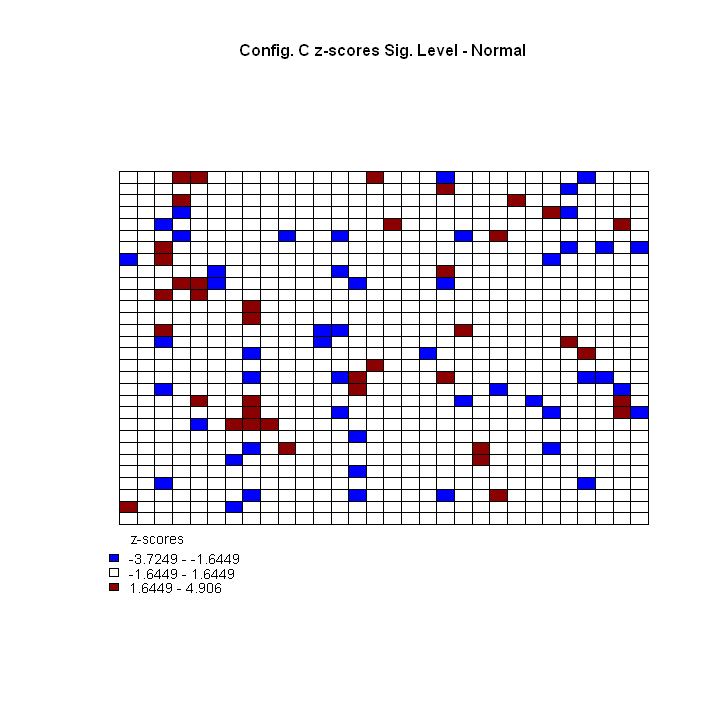

In [43]:
#determine number of class breaks and classify normal z-score significance
ncz1 <- 3 + length(pr) - 1
ncz2 <- 3 + length(pr)
CzM.MIi <- classIntervals(CzMIi,n=ncz1, style="fixed",
                          fixedBreaks=c(min(CzMIi), -zNormal, zNormal, max(CzMIi)))

#plot classified z-scores
pal1 <- c("blue","white","red4")

cols.CMIi <- findColours(CzM.MIi, pal1)

plot(inFeatures, col=cols.CMIi,lwd=.2,
     main="Config. C z-scores Sig. Level - Normal",cex.main=.8)

brks <- round(CzM.MIi$brks, ncz2)

leg <- paste(brks[-ncz2], brks[-1], sep=" - ")

legend("bottomleft", fill=pal1, legend=leg, 
       bty="n",title="z-scores",cex=.7)


## Moran Test - Configuration D

In config. D, two clusters of low values were present. Let's see what is uncovered by the local Moran Test.

In [44]:
#Compute local Moran
featD.MIi <- localmoran(inVd, inFeatures.listw,alternative="two.sided")

#retrieve the Moran I z-value
DzMIi <- featD.MIi[,4]

### Map the Moran z-scores for Config. D

The autocorrelation tests for config. D seem to have uncovered two pockets of autocorrelation as well as many distributed pockets of spatial autocorrelation.

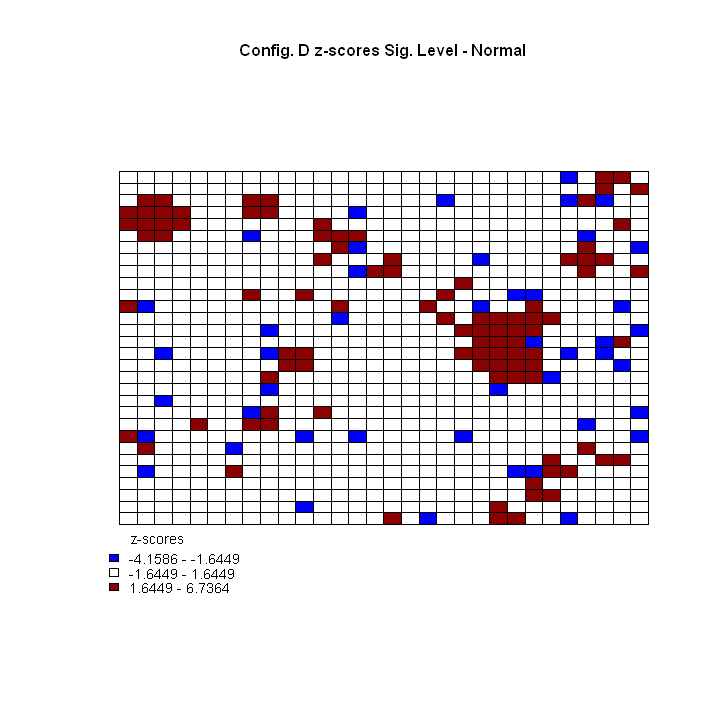

In [45]:
#determine number of class breaks and classify normal z-score significance
ncz1 <- 3 + length(pr) - 1
ncz2 <- 3 + length(pr)
DzM.MIi <- classIntervals(DzMIi,n=ncz1, style="fixed",
                          fixedBreaks=c(min(DzMIi), -zNormal, zNormal, max(DzMIi)))

#plot classified z-scores
pal1 <- c("blue","white","red4")

cols.DMIi <- findColours(DzM.MIi, pal1)

plot(inFeatures, col=cols.DMIi,lwd=.2,
     main="Config. D z-scores Sig. Level - Normal",cex.main=.8)

brks <- round(DzM.MIi$brks, ncz2)

leg <- paste(brks[-ncz2], brks[-1], sep=" - ")

legend("bottomleft", fill=pal1, legend=leg, bty="n",title="z-scores",cex=.7)

## Moran Test - Configuration E

In config. E, two clusters of low values and two clusters of high values were present. Let's see what is uncovered by the local Moran Test.


In [46]:
#Compute local Moran
featE.MIi <- localmoran(inVe, inFeatures.listw,alternative="two.sided")

#retrieve the Moran I z-value
EzMIi <- featE.MIi[,4]

### Map the Moran z-scores for Config. D

The autocorrelation tests for config. D seem to have uncovered the four clusters as well as many distributed pockets of spatial autocorrelation.


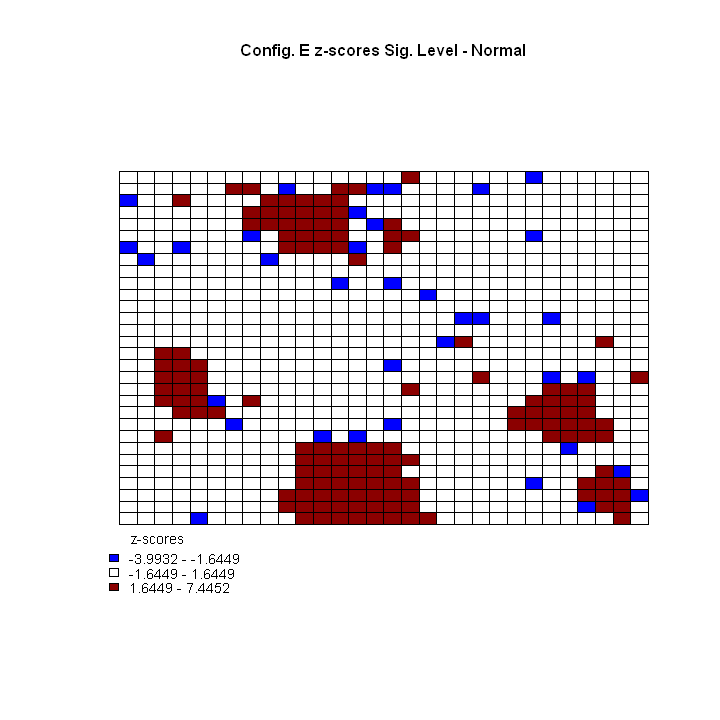

In [47]:
#determine number of class breaks and classify normal z-score significance
ncz1 <- 3 + length(pr) - 1

ncz2 <- 3 + length(pr)

EzM.MIi <- classIntervals(EzMIi,n=ncz1, style="fixed",
                          fixedBreaks=c(min(EzMIi), -zNormal, zNormal, max(EzMIi)))

#plot classified z-scores
pal1 <- c("blue","white","red4")

cols.EMIi <- findColours(EzM.MIi, pal1)

plot(inFeatures, col=cols.EMIi,lwd=.2,
     main="Config. E z-scores Sig. Level - Normal",cex.main=.8)

brks <- round(EzM.MIi$brks, ncz2)

leg <- paste(brks[-ncz2], brks[-1], sep=" - ")

legend("bottomleft", fill=pal1, legend=leg, 
       bty="n",title="z-scores",cex=.7)